<a href="https://colab.research.google.com/github/Shahul16/Healthcare_Analytics_Project/blob/main/Healthcare_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data - make sure to upload the CSV file if you're using Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset into a DataFrame
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Display the first few rows of the data to understand its structure
data.head()


Saving Doctor Visits.csv to Doctor Visits.csv


,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [54]:
# Find duplicates
num_duplicates = data.duplicated().sum()
print(f'Number of duplicates: {num_duplicates}')


Number of duplicates: 0


In [55]:
# Count illness occurrences
illness_count = data['illness'].value_counts()
print('Illness Count Distribution:')
print(illness_count)


Illness Count Distribution:
illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64


In [56]:
# Illness sum by gender
gender_illness = data.groupby('gender')['illness'].sum()
print('Total Illness by Gender:')
print(gender_illness)


Total Illness by Gender:
gender
female    4353
male      3079
Name: illness, dtype: int64


In [57]:
# Maximum, median, and minimum income
income_stats = data['income'].describe()[['min', '50%', 'max']]
print('Income Statistics (Min, Median, Max):')
print(income_stats)


Income Statistics (Min, Median, Max):
min    0.00
50%    0.55
max    1.50
Name: income, dtype: float64


In [58]:
# Sum of reduced days by gender
reduced_days_gender = data.groupby('gender')['reduced'].sum()
print('Reduced Days of Activity by Gender:')
print(reduced_days_gender)


Reduced Days of Activity by Gender:
gender
female    2636
male      1837
Name: reduced, dtype: int64


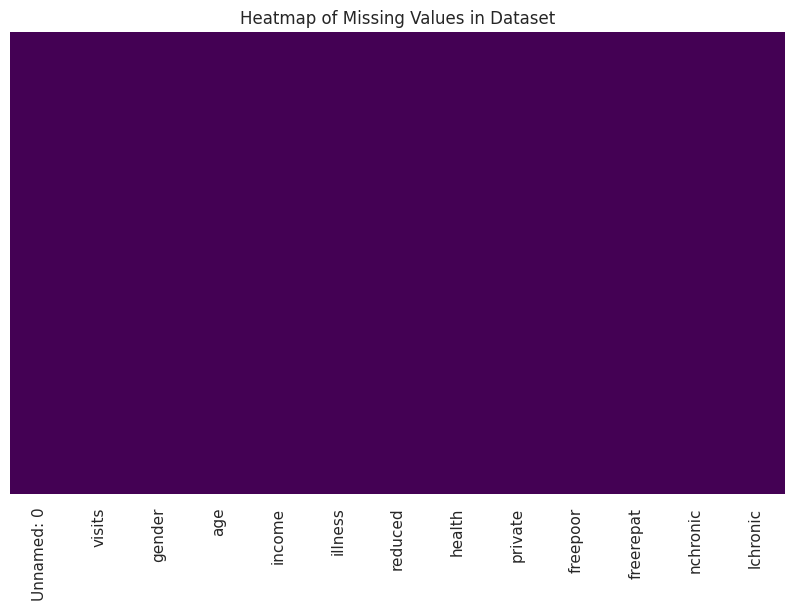

In [59]:
#Visualizations
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values in Dataset")
plt.show()


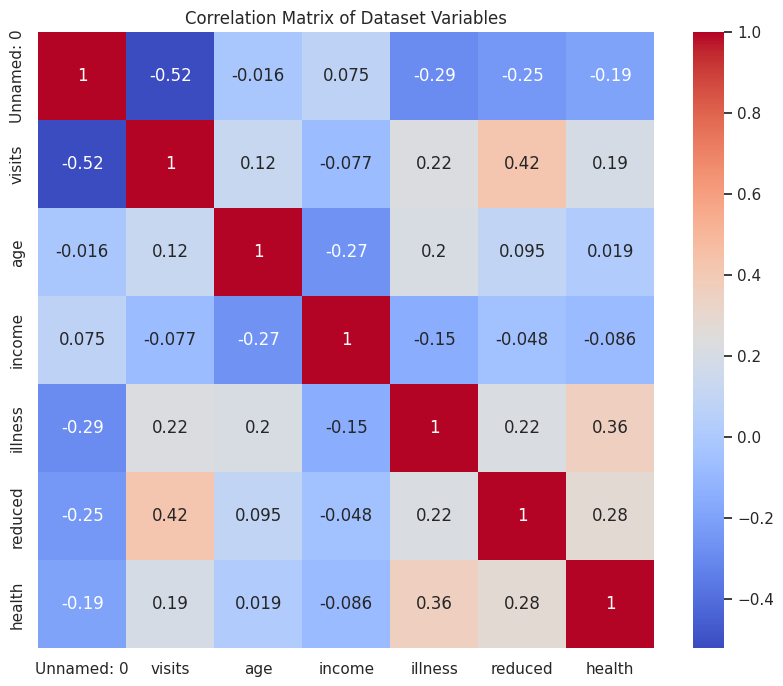

In [60]:
correlation_matrix = data.corr(numeric_only=True) # Specify numeric_only to avoid future warnings
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Dataset Variables")
plt.show()


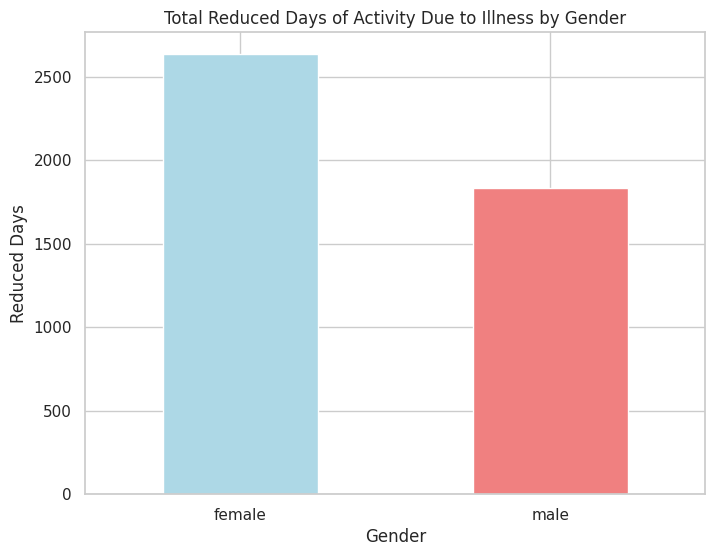

In [61]:
plt.figure(figsize=(8, 6))
reduced_days_gender.plot(kind='bar', color=['lightblue', 'lightcoral'], legend=False)
plt.title("Total Reduced Days of Activity Due to Illness by Gender")
plt.xlabel("Gender")
plt.ylabel("Reduced Days")
plt.xticks(rotation=0)
plt.show()


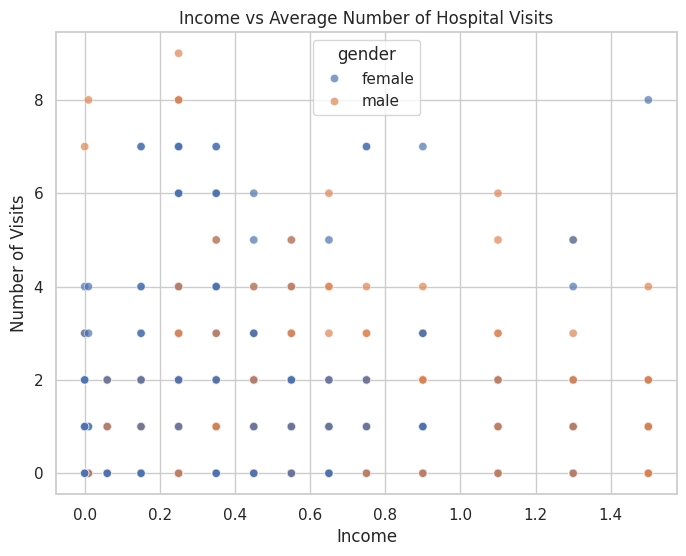

In [62]:
#Additional Charts for PPT
#Chart 1: Income vs. Average Number of Hospital Visits
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='income', y='visits', hue='gender', alpha=0.7)
plt.title("Income vs Average Number of Hospital Visits")
plt.xlabel("Income")
plt.ylabel("Number of Visits")
plt.show()


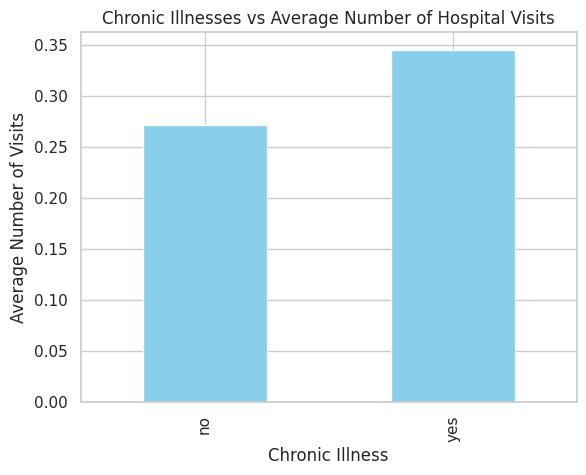

In [63]:
#Chart 2: Chronic Illnesses vs Average Number of Hospital Visits
chronic_vs_visits = data.groupby('nchronic')['visits'].mean()
chronic_vs_visits.plot(kind='bar', color='skyblue')
plt.title("Chronic Illnesses vs Average Number of Hospital Visits")
plt.xlabel("Chronic Illness")
plt.ylabel("Average Number of Visits")
plt.show()


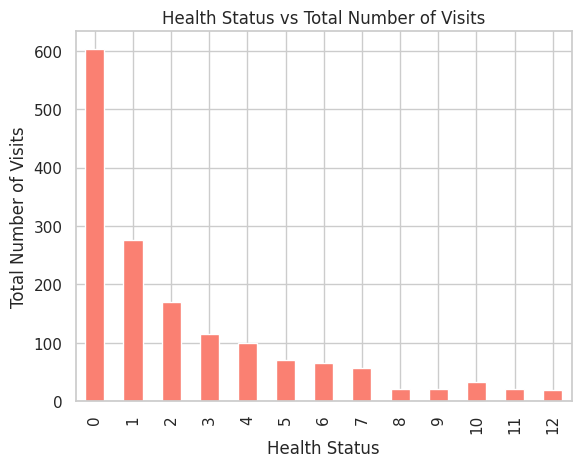

In [64]:
#Chart 3: Health Status vs Total Number of Visits
health_visits = data.groupby('health')['visits'].sum()
health_visits.plot(kind='bar', color='salmon')
plt.title("Health Status vs Total Number of Visits")
plt.xlabel("Health Status")
plt.ylabel("Total Number of Visits")
plt.show()
